### Imports

In [80]:
import pickle

import numpy as np

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

### Load Data

In [81]:
with open('X', 'rb') as file:
    X = pickle.load(file)
    
with open('y', 'rb') as file:
    y = pickle.load(file)
    
with open('gloss_map', 'rb') as file:
    gloss_map = pickle.load(file)

### Feature Scaling

In [82]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### One Hot Encoding

In [83]:
y = utils.to_categorical(y, len(gloss_map))

### Train Test Split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=0)

### Create Neural Network

In [85]:
# Create a Sequential Model
model = models.Sequential()

# Add Input Layer
model.add(layers.InputLayer(input_shape=X_train[0].shape))
model.add(layers.Dense(200, activation='relu', input_shape=X_train[0].shape))

# Add Hidden Layers
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))

# Add Output Layers
model.add(layers.Dense(len(gloss_map), activation='softmax'))

# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [86]:
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=len(X_train)
)

Train on 4880 samples, validate on 2092 samples
Epoch 1/5
4880/4880 [==============================] - 1s 142us/sample - loss: 3.8932 - accuracy: 0.0232 - val_loss: 3.7164 - val_accuracy: 0.0645
Epoch 2/5
4880/4880 [==============================] - 0s 14us/sample - loss: 3.7235 - accuracy: 0.0574 - val_loss: 3.5752 - val_accuracy: 0.1200
Epoch 3/5
4880/4880 [==============================] - 0s 14us/sample - loss: 3.5761 - accuracy: 0.1096 - val_loss: 3.4456 - val_accuracy: 0.1864
Epoch 4/5
4880/4880 [==============================] - 0s 17us/sample - loss: 3.4416 - accuracy: 0.1838 - val_loss: 3.3201 - val_accuracy: 0.2533
Epoch 5/5
4880/4880 [==============================] - 0s 14us/sample - loss: 3.3122 - accuracy: 0.2500 - val_loss: 3.1936 - val_accuracy: 0.3179


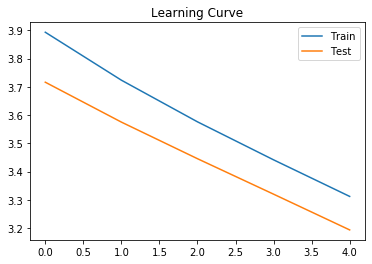

In [87]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Learning Curve')
plt.legend()
plt.show()

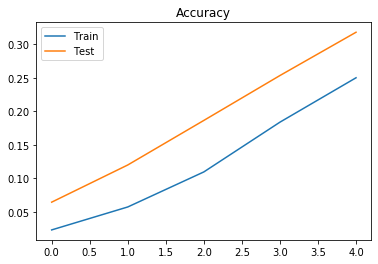

In [88]:
# plt.plot(history.history['acc'], label='Train')
# plt.plot(history.history['val_acc'], label='Test')
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Accuracy')
plt.legend()
plt.show()

### Save Model

In [89]:
model.save('model.h5')

In [90]:
import tensorflow as tf
tf.test.is_gpu_available()

False